<a href="https://colab.research.google.com/github/heitor-eng/Machine-Learning-Examples/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entendendo Decision Tree

## Conceitos:

Árvore de decisão é um dos diversos algorítmos de machine learning, para análises iniciais e uma maneira inicial de começar a entender como está sendo feita a divisão dos dados.

[Decision Tree Regressor - Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor).



In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**OVERFITTING**

<p align=center>
<img src="https://github.com/heitor-eng/H_Data_Science/blob/master/Imagens/OVER%20e%20UNDER%20fitting.png?raw=true" width="60%"></p>

"O overfitting como pode-se observar no primeiro gráfico, mostra a linha prevista cobre todos os pontos no gráfico. Nessa condição, podemos pensar que é um bom modelo, pois, cobre todos os pontos sem erro algum. Mas isso não é verdade, a linha prevista no gráfico abrange todos os pontos que são ruídos e discrepantes. Esse modelo também é responsável por prever resultados ruins devido à sua alta complexidade, também chamado de alta variância (high variance).

Quando o modelo aprende sinais e ruídos nos dados de treinamento e não tem um bom desempenho em novos dados sobre os quais o modelo não foi treinado.

Na relaçâo viés e variância tem-se que, o viés é reduzido e a variação aumenta em relação à complexidade do modelo. Quanto mais parâmetros são adicionados a um modelo, a complexidade do modelo aumenta e a variação se torna nossa principal preocupação, enquanto o viés diminui constantemente."

Fonte: [Dados Aleatórios](https://www.dadosaleatorios.com.br/post/overfitting/)

In [18]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
X = data.drop('median_house_value', axis = 1)
y = data['median_house_value']

Xtr, Xval, ytr, yval = train_test_split(X, y,test_size = 0.5, random_state = 0)

tree = DecisionTreeRegressor(max_depth=13)
tree.fit(Xtr,ytr)

p = tree.predict(Xval)

np.sqrt(mean_squared_error(yval,p))

69334.90443788667

O erro médio quadrado (`mean_squared_error`) para uma situação infinita `tree = DecisionTreeRegressor()` sem parâmetros definidos.

Isso acontece porquê quanto mais profunda for a árvore de decisão, maiores são as chances dela sofrer **overfitting**. Isso acontece pois a árvore de decisão vai em busca de parâmetros que tendem a reduzir cada vez mais as impurezas dos nós, e com isso temos perda de otimização do processamento.

Resumindo: Para cada _feature_ a árvore vai explorar o melhor ponto de corte.

Exemplo:
features = área de quartos

area < 1000

pureza dos nós?

area < 500

pureza?



---
Para resolver esses problemas de overfitting existe o parâmetro `max_depth`  

> Sem utilizar esse parâmetro o erro ao quadrado fica : 73319.06193196644

Agora quando usa-se `max_depth = 1`: 96156.45813876118 o erro ao quadrado é maior, porém aqui o que estou tentando encontrar é o ponto ótimo do erro ao quadrado, ou seja, até qual profundidade consigo atingir nas subdivisões sem causar o overfittig.

Eu sei o limite quando passar o valor de 73319.061931, pois esse é o valor que o algorítmo calcula sem ter nenhum limite estabelecido.

Com o parâmetro de `max_depth= 13` tem uma melhora de que o erro quadrado médio fica entre 69334.90443788667 e após isso ele volta  subir o erro quadrado médio.


[Text(418.5, 453.0, 'median_income <= 5.02\nsquared_error = 13557558368.64\nsamples = 8500\nvalue = 207877.802'),
 Text(209.25, 271.8, 'median_income <= 2.832\nsquared_error = 8408672354.196\nsamples = 6650\nvalue = 173230.209'),
 Text(104.625, 90.59999999999997, 'squared_error = 5232614885.519\nsamples = 2683\nvalue = 128413.198'),
 Text(313.875, 90.59999999999997, 'squared_error = 8279521231.512\nsamples = 3967\nvalue = 203541.285'),
 Text(627.75, 271.8, 'median_income <= 6.829\nsquared_error = 12239344139.08\nsamples = 1850\nvalue = 332421.852'),
 Text(523.125, 90.59999999999997, 'squared_error = 8808047041.751\nsamples = 1275\nvalue = 291458.88'),
 Text(732.375, 90.59999999999997, 'squared_error = 7876907783.956\nsamples = 575\nvalue = 423252.791')]

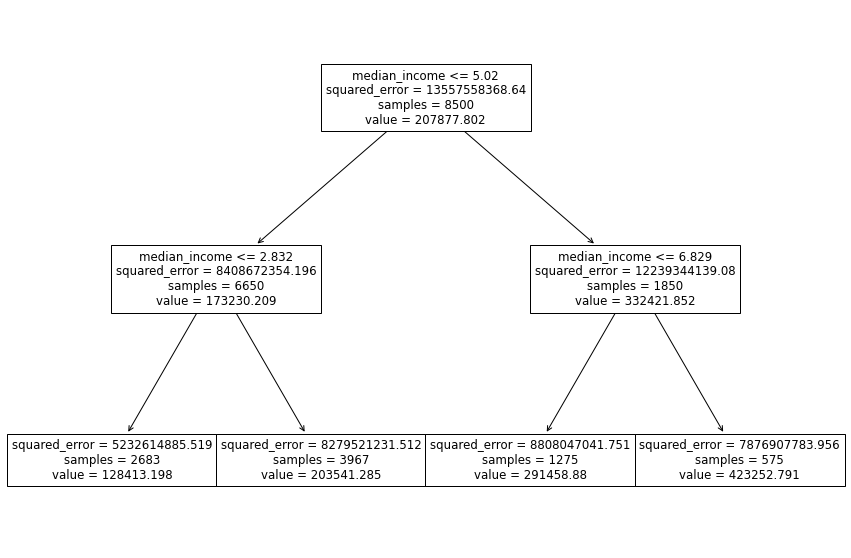

In [23]:
pylab.figure(figsize=(15,10))
plot_tree(tree, feature_names= Xtr.columns)

### `Min_sample_leaf`

Permite o número mínimo de exemplos finais na árvore de decisão. O bom desse parâmetro é que conseguimos ter definido uma quantidade limite de amostras sem ter que ficar descobrindo os parâmetros antes do overfitting. Ou seja, estabeleço um valor X de exemplos e assim consigo ver a média.


In [39]:
from pandas.core.common import random_state
X = data.drop('median_house_value', axis = 1)
y = data['median_house_value']

Xtr, Xval, ytr, yval = train_test_split(X, y,test_size = 0.5, random_state = 0)

tree = DecisionTreeRegressor(min_samples_leaf=14, random_state=0)
tree.fit(Xtr,ytr)

p = tree.predict(Xval)

np.sqrt(mean_squared_error(yval,p))

62290.429553839494